# Predicting Insurance Charges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

Description of the Data

In [3]:
data = pd.read_csv(r"C:\\Users\\WIN\Desktop\\Welingkar\\Internshala Data Science\\Predictive Modelling\\insurance.csv")
print(data.head(15))

    age     sex     bmi  children  smoker  region      charges
0    19  female  27.900         0       1       3  16884.92400
1    18    male  33.770         1       0       2   1725.55230
2    28    male  33.000         3       0       2   4449.46200
3    33    male  22.705         0       0       1  21984.47061
4    32    male  28.880         0       0       1   3866.85520
5    31  female  25.740         0       0       2   3756.62160
6    46  female  33.440         1       0       2   8240.58960
7    37  female  27.740         3       0       1   7281.50560
8    37    male  29.830         2       0       0   6406.41070
9    60  female  25.840         0       0       1  28923.13692
10   25    male  26.220         0       0       0   2721.32080
11   62  female  26.290         0       1       2  27808.72510
12   23    male  34.400         0       0       3   1826.84300
13   56  female  39.820         0       0       2  11090.71780
14   27    male     NaN         0       1       2  3961

Data Cleaning Process

In [4]:
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

bmi    6
dtype: int64


In [5]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

Series([], dtype: int64)


In [6]:
sex = pd.get_dummies(data['sex'])
print(sex.head(5))

   female  male
0       1     0
1       0     1
2       0     1
3       0     1
4       0     1


In [7]:
sex = pd.get_dummies(data['sex'], drop_first=True)

In [8]:
data = pd.concat([data , sex],axis=1)

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,1,3,16884.92400,0
1,18,male,33.770,1,0,2,1725.55230,1
2,28,male,33.000,3,0,2,4449.46200,1
3,33,male,22.705,0,0,1,21984.47061,1
4,32,male,28.880,0,0,1,3866.85520,1


In [10]:
data = data.drop(columns=['sex'])

In [11]:
data_y = data[['charges']].values

Visualisation

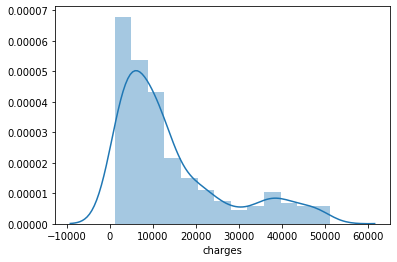

In [12]:
seabornInstance.distplot(data['charges'])

Training the model for regression

In [13]:
data_x = data[['age', 'male', 'bmi', 'children','smoker', 'region']].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [16]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Understand the coeficients and intercept obtained and determining how fit the model is.

In [17]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [[ 4008.69251052    44.32510936  1591.07541208   860.70908021
  10653.34443718    27.20294411]]


In [18]:
print('Intercept: \n', regressor.intercept_)

Intercept: 
 [14529.69776471]


In [19]:
y_pred = regressor.predict(x_test)

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3955.046644398488
Mean Squared Error: 35160083.69805881
Root Mean Squared Error: 5929.59388980888


In [21]:
print('R - Square score: {}'.format(regressor.score(x_test, y_test)))

R - Square score: 0.7048007379183912
